# Task 1

In [98]:
# import necessary and essential libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import zscore
import plotly.express as px

In [72]:
# Display all the columns of Dataframes
data = pd.read_excel("/content/HousePrediction.xlsx")
data.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotArea', 'LotConfig', 'BldgType',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'Exterior1st', 'BsmtFinSF2',
       'TotalBsmtSF', 'SalePrice'],
      dtype='object')

In [73]:
# Read the data and display the first 100 rows from the data
print(data.head(100))

    Id  MSSubClass MSZoning  LotArea LotConfig BldgType  OverallCond  \
0    0          60       RL     8450    Inside     1Fam            5   
1    1          20       RL     9600       FR2     1Fam            8   
2    2          60       RL    11250    Inside     1Fam            5   
3    3          70       RL     9550    Corner     1Fam            5   
4    4          60       RL    14260       FR2     1Fam            5   
..  ..         ...      ...      ...       ...      ...          ...   
95  95          60       RL     9765    Corner     1Fam            8   
96  96          20       RL    10264    Inside     1Fam            5   
97  97          20       RL    10921    Inside     1Fam            5   
98  98          30       RL    10625    Corner     1Fam            5   
99  99          20       RL     9320    Inside     1Fam            5   

    YearBuilt  YearRemodAdd Exterior1st  BsmtFinSF2  TotalBsmtSF  SalePrice  
0        2003          2003     VinylSd         0.0      

In [74]:
# Give the column insights

print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2919 entries, 0 to 2918
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Id            2919 non-null   int64  
 1   MSSubClass    2919 non-null   int64  
 2   MSZoning      2915 non-null   object 
 3   LotArea       2919 non-null   int64  
 4   LotConfig     2919 non-null   object 
 5   BldgType      2919 non-null   object 
 6   OverallCond   2919 non-null   int64  
 7   YearBuilt     2919 non-null   int64  
 8   YearRemodAdd  2919 non-null   int64  
 9   Exterior1st   2918 non-null   object 
 10  BsmtFinSF2    2918 non-null   float64
 11  TotalBsmtSF   2918 non-null   float64
 12  SalePrice     1460 non-null   float64
dtypes: float64(3), int64(6), object(4)
memory usage: 296.6+ KB
None


# Task 2

In [75]:
# Checking the missing values
print(data.isna())

         Id  MSSubClass  MSZoning  LotArea  LotConfig  BldgType  OverallCond  \
0     False       False     False    False      False     False        False   
1     False       False     False    False      False     False        False   
2     False       False     False    False      False     False        False   
3     False       False     False    False      False     False        False   
4     False       False     False    False      False     False        False   
...     ...         ...       ...      ...        ...       ...          ...   
2914  False       False     False    False      False     False        False   
2915  False       False     False    False      False     False        False   
2916  False       False     False    False      False     False        False   
2917  False       False     False    False      False     False        False   
2918  False       False     False    False      False     False        False   

      YearBuilt  YearRemodAdd  Exterior

In [76]:
# Features with NAN Values
print(data.isnull().sum())

Id                 0
MSSubClass         0
MSZoning           4
LotArea            0
LotConfig          0
BldgType           0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
Exterior1st        1
BsmtFinSF2         1
TotalBsmtSF        1
SalePrice       1459
dtype: int64


In [77]:
# Calculate  with  mean  sales Price where the information is present or Missing

data['SalePrice'].fillna(data['SalePrice'].mean(), inplace = True)

#checking for null values again for confirmation
print(data.isnull().sum())

Id              0
MSSubClass      0
MSZoning        4
LotArea         0
LotConfig       0
BldgType        0
OverallCond     0
YearBuilt       0
YearRemodAdd    0
Exterior1st     1
BsmtFinSF2      1
TotalBsmtSF     1
SalePrice       0
dtype: int64


In [78]:
# Gives the Count  of Numerical features
print("Count of Numerical features : ",data.select_dtypes(include=['number']).shape[1])

Count of Numerical features :  9


In [79]:
# Prints the first five rows of numerical values

data.select_dtypes(include=['number']).head(5)

,Id,MSSubClass,LotArea,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF2,TotalBsmtSF,SalePrice
0,0,60,8450,5,2003,2003,0.0,856.0,208500.0
1,1,20,9600,8,1976,1976,0.0,1262.0,181500.0
2,2,60,11250,5,2001,2002,0.0,920.0,223500.0
3,3,70,9550,5,1915,1970,0.0,756.0,140000.0
4,4,60,14260,5,2000,2000,0.0,1145.0,250000.0


In [80]:
# We will Compare the difference between all the years features with SalesPrice

print(data.groupby('YearBuilt').mean(numeric_only = True)['SalePrice'])

fig2 = px.bar(data, x= 'YearBuilt', y= 'SalePrice', color = 'SalePrice')
fig2.show()

YearBuilt
1872    122000.000000
1875     94000.000000
1879    180921.195890
1880    196680.039178
1882    168000.000000
            ...      
2006    215321.448610
2007    214385.740857
2008    259744.512105
2009    244496.334849
2010    252091.463927
Name: SalePrice, Length: 118, dtype: float64


In [81]:
# On the Discrete Variable  Find the relationship between Discrete and Sales price

reln = data['OverallCond'].corr(data['SalePrice'])
print("Relation between Overall Condtion and Sales Price :", reln)

# Visu of relationship

fig1 = px.scatter(data, x = 'OverallCond', y = 'SalePrice', color = 'OverallCond')
fig1.show()


Relation between Overall Condtion and Sales Price : -0.05503604000024567


In [82]:
fig = px.box(data, y = 'OverallCond',)
fig.show()

Relation between Total Square Basement Square Feet and SalePrice : 0.43191230945275105


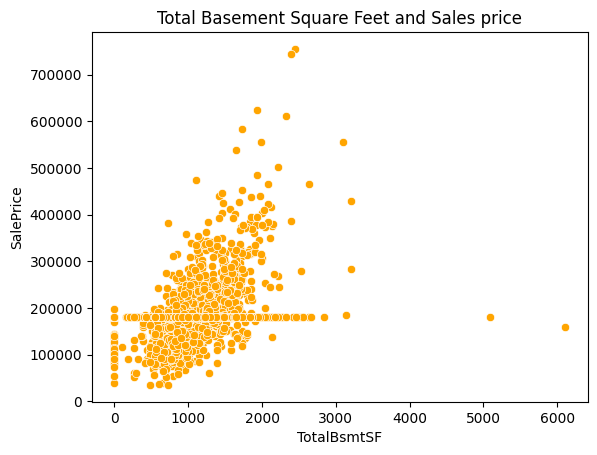

In [83]:
# On the Continous Variable  Find the relationship between Discrete and Sales Price

reln2 = data['TotalBsmtSF'].corr(data['SalePrice'])
print("Relation between Total Square Basement Square Feet and SalePrice :", reln2)
sns.scatterplot(x='TotalBsmtSF', y='SalePrice', data=data, color = 'orange').set_title("Total Basement Square Feet and Sales price")
plt.show()

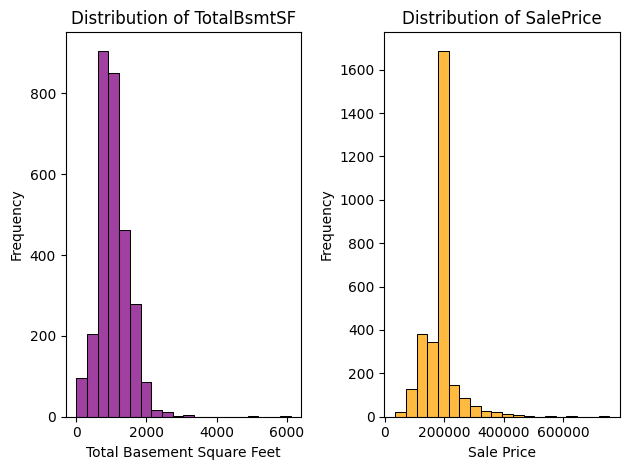

In [84]:
# Analyse the Continous values by creating the histogram to understand the distribution.

# Histogram for TotalBsmtSF
plt.subplot(1, 2, 1)
sns.histplot(data['TotalBsmtSF'], bins = 20, color='purple')
plt.title('Distribution of TotalBsmtSF')
plt.xlabel('Total Basement Square Feet')
plt.ylabel('Frequency')

# Histogram for SalePrice
plt.subplot(1, 2, 2)
sns.histplot(data['SalePrice'], bins=20, color='orange')
plt.title('Distribution of SalePrice')
plt.xlabel('Sale Price')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

In [85]:
# Apply the Lograthmic Transformation



# Task 3

In [86]:
# Find the outliers

scr = zscore(data['SalePrice'])
outliers = np.abs(scr)>3
res = data['SalePrice'][outliers]

print("Total Outliers =",len(res))
res

Total Outliers = 56


53      385000.0
58      438780.0
112     383970.0
151     372402.0
161     412500.0
178     501837.0
185     475000.0
224     386250.0
231     403000.0
278     415298.0
309     360000.0
313     375000.0
321     354000.0
336     377426.0
349     437154.0
378     394432.0
389     426000.0
440     555000.0
473     440000.0
477     380000.0
481     374000.0
496     430000.0
515     402861.0
527     446261.0
585     369900.0
591     451950.0
608     359100.0
644     370878.0
654     350000.0
661     402000.0
664     423000.0
678     372500.0
688     392000.0
691     755000.0
702     361919.0
769     538000.0
774     395000.0
798     485000.0
803     582933.0
825     385000.0
877     350000.0
898     611657.0
987     395192.0
1046    556581.0
1142    424870.0
1169    625000.0
1181    392500.0
1182    745000.0
1228    367294.0
1243    465000.0
1267    378500.0
1268    381000.0
1353    410000.0
1373    466500.0
1388    377500.0
1437    394617.0
Name: SalePrice, dtype: float64

In [87]:
# Find the relationship between Categorical  feature and Sales Price

# Categorial features

cat_feat = data.select_dtypes(include = ['object','category']).columns
print(cat_feat)

Index(['MSZoning', 'LotConfig', 'BldgType', 'Exterior1st'], dtype='object')


In [88]:
# relationship between Categorical  feature and Sales Price

columns = ['MSZoning', 'LotConfig', 'BldgType', 'Exterior1st']

for col in columns:
    fig = px.box(data, x=col, y='SalePrice', title=f'Relationship between {col} and SalePrice')
    fig.update_layout(title_text=f'Relationship between {col} and SalePrice', title_x=0.5)
    fig.show()



In [89]:
# Find the Correlation between Numerical Features and Sales Price

# Numerical features
data.select_dtypes(include=['number']).head(5)

,Id,MSSubClass,LotArea,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF2,TotalBsmtSF,SalePrice
0,0,60,8450,5,2003,2003,0.0,856.0,208500.0
1,1,20,9600,8,1976,1976,0.0,1262.0,181500.0
2,2,60,11250,5,2001,2002,0.0,920.0,223500.0
3,3,70,9550,5,1915,1970,0.0,756.0,140000.0
4,4,60,14260,5,2000,2000,0.0,1145.0,250000.0


In [90]:
# Correlation between Numerical Features and Sales Price

data[['SalePrice', 'LotArea', 'MSSubClass','TotalBsmtSF']].corr(method='pearson')

,SalePrice,LotArea,MSSubClass,TotalBsmtSF
SalePrice,1.000000,0.236105,-0.059294,0.431912
LotArea,0.236105,1.000000,-0.201730,0.254138
MSSubClass,-0.059294,-0.201730,1.000000,-0.219965
TotalBsmtSF,0.431912,0.254138,-0.219965,1.000000


In [91]:
# Visualization
yax = ['LotArea', 'MSSubClass','TotalBsmtSF']

plot = px.scatter(
    data_frame = data,
    x = 'SalePrice',
    y = yax)

plot

In [92]:
# Find Continous Features vs  Sales Price

# Continuous features
data.select_dtypes(exclude=['object'])

,Id,MSSubClass,LotArea,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF2,TotalBsmtSF,SalePrice
0,0,60,8450,5,2003,2003,0.0,856.0,208500.00000
1,1,20,9600,8,1976,1976,0.0,1262.0,181500.00000
2,2,60,11250,5,2001,2002,0.0,920.0,223500.00000
3,3,70,9550,5,1915,1970,0.0,756.0,140000.00000
4,4,60,14260,5,2000,2000,0.0,1145.0,250000.00000
...,...,...,...,...,...,...,...,...,...
2914,2914,160,1936,7,1970,1970,0.0,546.0,180921.19589
2915,2915,160,1894,5,1970,1970,0.0,546.0,180921.19589
2916,2916,20,20000,7,1960,1996,0.0,1224.0,180921.19589
2917,2917,85,10441,5,1992,1992,0.0,912.0,180921.19589


In [93]:
# Continous Features vs  Sales Price

continuous_features = ['LotArea', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'BsmtFinSF2', 'TotalBsmtSF']
target_variable = 'SalePrice'


selected_data = data[continuous_features + [target_variable]]
selected_data = selected_data.apply(pd.to_numeric, errors='coerce')
correlation_matrix = selected_data.corr()
correlation_with_sale_price = correlation_matrix[target_variable]

print(correlation_with_sale_price)

LotArea         0.236105
OverallCond    -0.055036
YearBuilt       0.368664
YearRemodAdd    0.354302
BsmtFinSF2     -0.007672
TotalBsmtSF     0.431912
SalePrice       1.000000
Name: SalePrice, dtype: float64


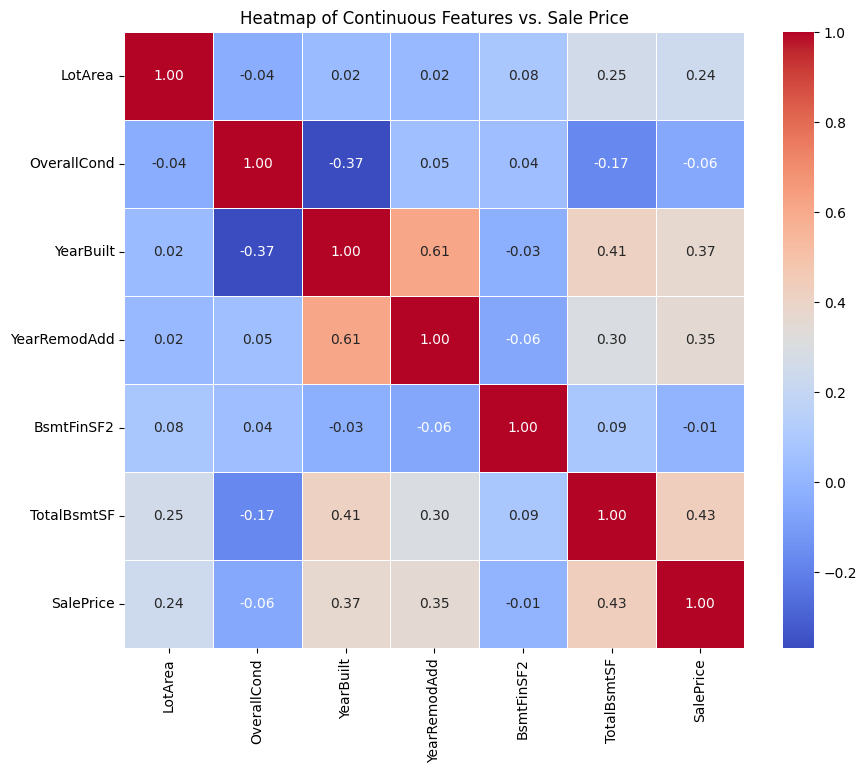

In [94]:
# Visualization

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Heatmap of Continuous Features vs. Sale Price')
plt.show()

In [97]:
# Feature Engineering for the
# a)Handle the Missing Values

mssv =  data.isnull().sum()

data['BsmtFinSF2'].fillna(data['BsmtFinSF2'].mean, inplace = True)
data['TotalBsmtSF'].fillna(data['TotalBsmtSF'].mean, inplace = True)

data['MSZoning'].fillna(data['MSZoning'].mode()[0], inplace=True)
data['Exterior1st'].fillna(data['Exterior1st'].mode()[0], inplace=True)
mssv

Id              0
MSSubClass      0
MSZoning        0
LotArea         0
LotConfig       0
BldgType        0
OverallCond     0
YearBuilt       0
YearRemodAdd    0
Exterior1st     0
BsmtFinSF2      0
TotalBsmtSF     0
SalePrice       0
dtype: int64

In [96]:
data.head()

,Id,MSSubClass,MSZoning,LotArea,LotConfig,BldgType,OverallCond,YearBuilt,YearRemodAdd,Exterior1st,BsmtFinSF2,TotalBsmtSF,SalePrice
0,0,60,RL,8450,Inside,1Fam,5,2003,2003,VinylSd,0.0,856.0,208500.0
1,1,20,RL,9600,FR2,1Fam,8,1976,1976,MetalSd,0.0,1262.0,181500.0
2,2,60,RL,11250,Inside,1Fam,5,2001,2002,VinylSd,0.0,920.0,223500.0
3,3,70,RL,9550,Corner,1Fam,5,1915,1970,Wd Sdng,0.0,756.0,140000.0
4,4,60,RL,14260,FR2,1Fam,5,2000,2000,VinylSd,0.0,1145.0,250000.0
